<a href="https://colab.research.google.com/github/negarhonarvar/Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of DBSCAN for Clustering Data points in a 2-D space

#Initiation

In [ ]:
# !pip install datashader
# import datashader as ds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pandas as pd
import colorcet as cc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-HW4/d1.csv')
# Extract X and Y columns
x = df['x']
y = df['y']

In [ ]:
# Read the CSV file into a DataFrame
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-HW4/d2.csv')
# Extract X and Y columns
x_2 = df_2['x']
y_2 = df_2['y']

# Visualazing data with scatter plot

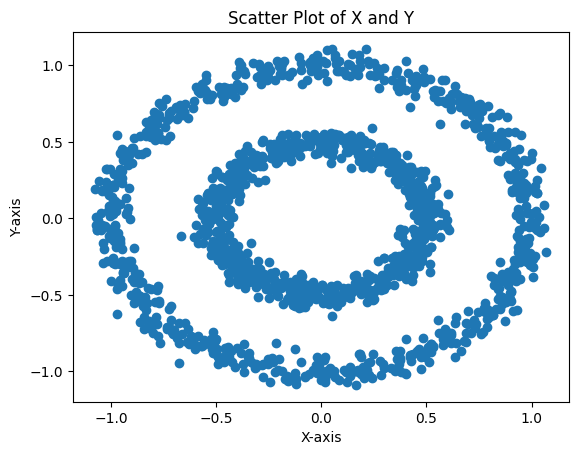

In [ ]:
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X and Y')

# Show the plot
plt.show()

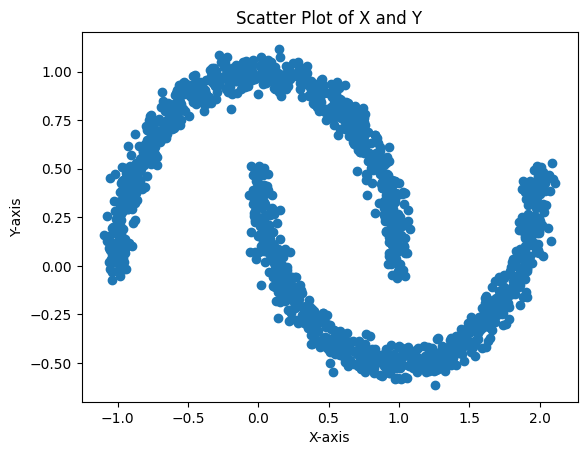

In [ ]:
plt.scatter(x_2, y_2)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X and Y')

# Show the plot
plt.show()

In [ ]:
# # visualizing the data
# array = np.array(df)
# cvs = ds.Canvas(plot_width=500, plot_height=500)
# agg = cvs.points(df, 'x', 'y')  # this is the histogram
# img = ds.tf.set_background(ds.tf.shade(agg, how="log", cmap=cc.fire), "blue").to_pil()  # create a rasterized imageplt.imshow(img)
# plt.axis('off')
# plt.show()

#Implementation of DBSCAN

In [ ]:
def euclidean_distance(point1, point2):
    point1 = np.array(point1, dtype=float)
    point2 = np.array(point2, dtype=float)
    return np.sqrt(np.sum((point1 - point2)**2))

In [ ]:
# it finds neighbors of a specific point in range 0 to eps and returns them
def get_new_neighbors(data, point, eps):
    neighbors = []
    for i, neighbor in enumerate(data):
        distance = euclidean_distance(point, neighbor)
        if  distance <= eps:
            neighbors.append(i)
    return neighbors

In [ ]:
def merge_clusters(data, labels, index, neighbors, cluster_id, eps, min_samples):
    labels[index] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]

        if labels[neighbor_index] == 0:  # Unvisited point
            labels[neighbor_index] = cluster_id

            new_neighbors = get_new_neighbors(data, data[neighbor_index], eps)

            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors

        elif labels[neighbor_index] == -1:  # Noise point
            labels[neighbor_index] = cluster_id

        i += 1

In [ ]:
def dbscan(data, eps, min_samples):
    labels = np.zeros(len(data))  # 0 represents unvisited points, -1 represents noise

    cluster_id = 0
    for i, point in enumerate(data):
        if labels[i] != 0:  # Skip visited points
            continue

        neighbors = []
        for i, neighbor in enumerate(data):
             distance = euclidean_distance(point, neighbor)
             if  distance <= eps:
                 neighbors.append(i)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            merge_clusters(data, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/ML-HW4/d1.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
points = []
for point in csvreader:
    points.append(point)
# points

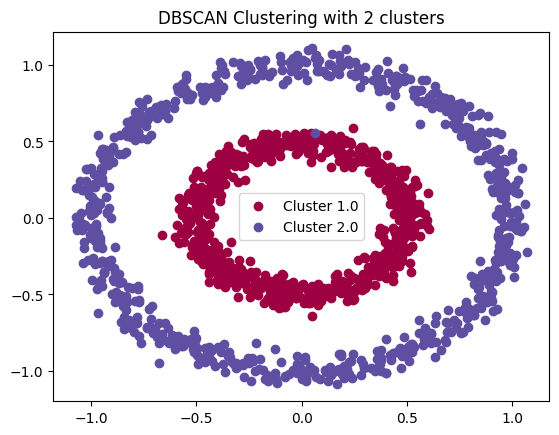

In [ ]:
# Apply DBSCAN algorithm
eps = 0.15
min_samples = 10
cluster_labels = dbscan(df.values, eps, min_samples)

# Plot the clusters
df['Cluster'] = cluster_labels
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    cluster_points = df[df['Cluster'] == k]
    plt.scatter(cluster_points['x'].astype(float), cluster_points['y'].astype(float), c=[col], label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering with {len(unique_labels)} clusters')
plt.legend()
plt.show()


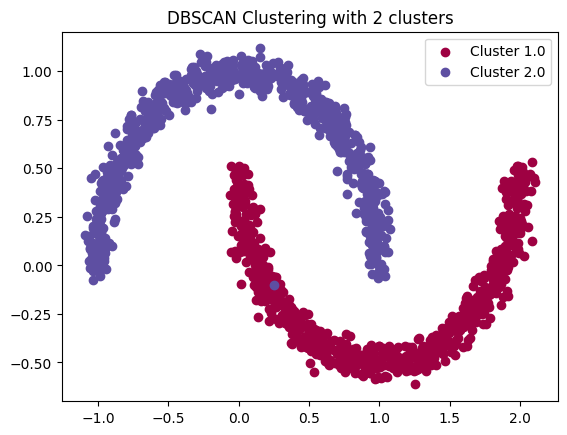

In [ ]:
# Apply DBSCAN algorithm
eps = 0.15
min_samples = 10
cluster_labels = dbscan(df_2.values, eps, min_samples)

# Plot the clusters
df_2['Cluster'] = cluster_labels
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    cluster_points = df_2[df_2['Cluster'] == k]
    plt.scatter(cluster_points['x'].astype(float), cluster_points['y'].astype(float), c=[col], label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering with {len(unique_labels)} clusters')
plt.legend()
plt.show()